In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [51]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Eunpyeong_Gu_Only.csv")

In [52]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [9]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A12287204,1138010100,976,20030710.0,개별난방,아파트,단일계약,29.0,282.0,779.0
1,A12287203,1138010100,464,20030710.0,개별난방,아파트,단일계약,6.0,32.0,131.0
2,A12287202,1138010100,280,20030725.0,개별난방,아파트,단일계약,10.0,18.0,289.0
3,A12209001,1138010100,196,20000316.0,개별난방,아파트,종합계약,8.0,50.0,176.0
4,A10024828,1138010100,1192,20211209.0,개별난방,아파트,단일계약,34.0,12.0,1356.0
...,...,...,...,...,...,...,...,...,...,...
117,A41279919,1138011400,143,20091223.0,지역난방,아파트,종합계약,9.0,0.0,166.0
118,A41279921,1138011400,1022,20100709.0,지역난방,아파트,단일계약,27.0,113.0,1703.0
119,A10025677,1138011400,350,20190208.0,지역난방,아파트,종합계약,7.0,61.0,199.0
120,A10025765,1138011400,361,20190130.0,지역난방,아파트,종합계약,13.0,0.0,454.0


In [10]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        0
Heating_Method    0
House_Type        0
Elec_Con          5
Elev_Num          4
Park_Above        5
Park_Below        5
dtype: int64

<AxesSubplot: >

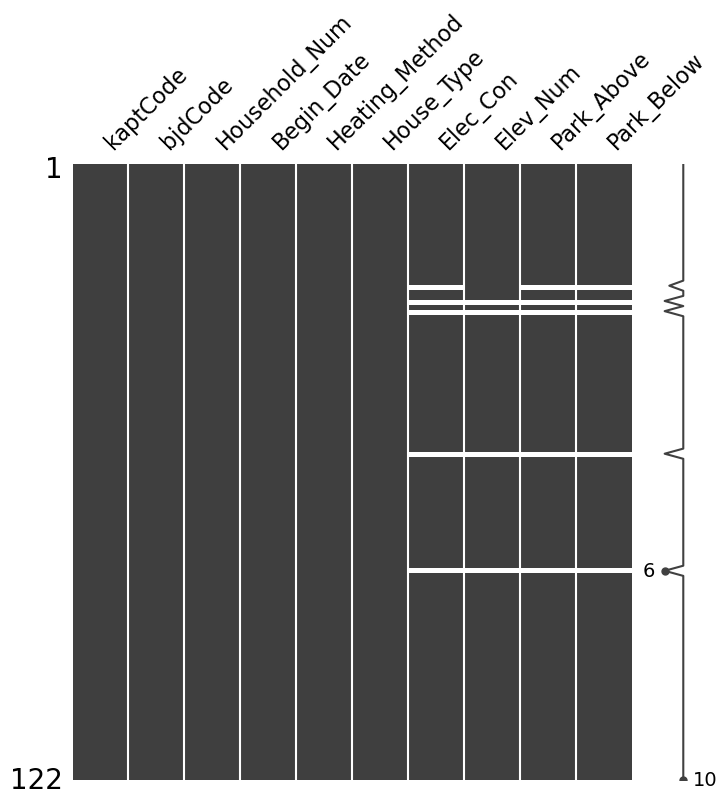

In [11]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [12]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 0 null values, and they are located at 
[]


In [13]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0     2003-07-10
1     2003-07-10
2     2003-07-25
3     2000-03-16
4     2021-12-09
         ...    
117   2009-12-23
118   2010-07-09
119   2019-02-08
120   2019-01-30
121   2018-03-22
Name: Begin_Date, Length: 122, dtype: datetime64[ns]


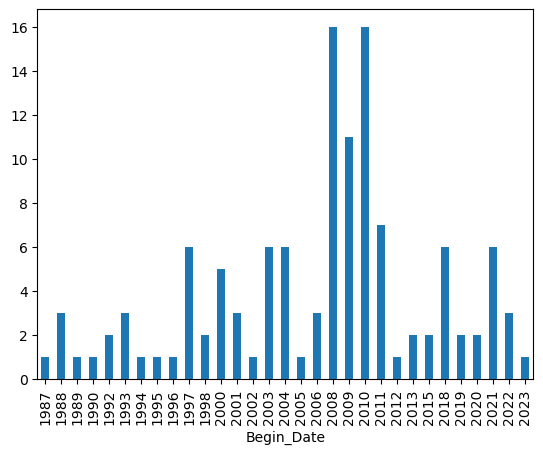

In [14]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

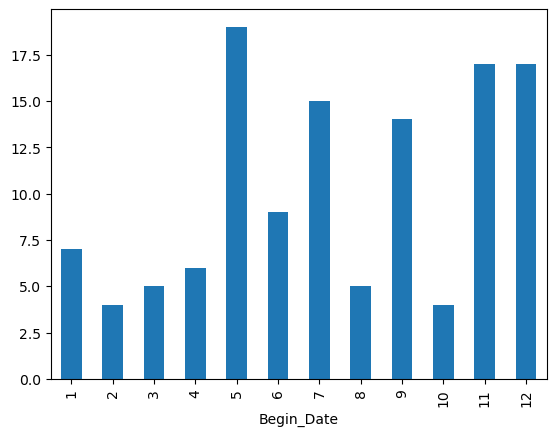

In [15]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [53]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0       976
1       464
2       280
3       196
4      1192
       ... 
117     143
118    1022
119     350
120     361
121     142
Name: Household_Num, Length: 122, dtype: int64

In [54]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

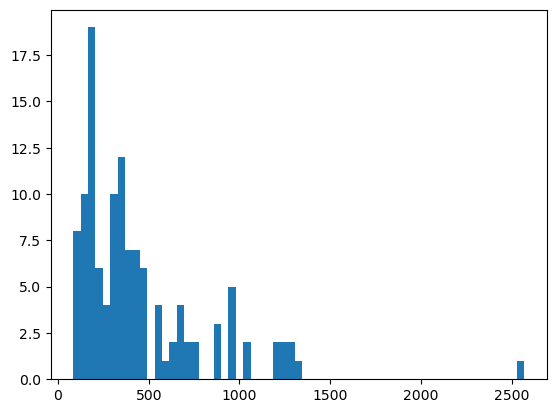

In [55]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [19]:
Household_Num.describe()

count     122.000000
mean      448.516393
std       366.819505
min        84.000000
25%       196.500000
50%       345.500000
75%       565.500000
max      2569.000000
Name: Household_Num, dtype: float64

In [20]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [21]:
printApt(Household_Num, df, dfInfo)

kaptCode           A10024831
bjdCode           1138010700
Household_Num           2569
Begin_Date        20210527.0
Heating_Method       개별난방+기타
House_Type               아파트
Elec_Con                단일계약
Elev_Num                93.0
Park_Above               0.0
Park_Below            2974.0
Name: 62, dtype: object
     kaptCode Complex_Name
65  A10024831   녹번역e편한세상캐슬


## Heating_Method

In [22]:
# null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 0 null values, and they are located at 
[]


0      개별난방
1      개별난방
2      개별난방
3      개별난방
4      개별난방
       ... 
117    지역난방
118    지역난방
119    지역난방
120    지역난방
121    지역난방
Name: Heating_Method, Length: 122, dtype: object

In [23]:
Heating_Method = Heating_Method.dropna()

In [24]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3]
Index(['개별난방', '중앙난방', '개별난방+기타', '지역난방'], dtype='object')


In [25]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    80
3    40
1     1
2     1
dtype: int64

In [27]:
eng_ind_HM = ['Individual','Central', 'Indiv + Other', 'Regional']

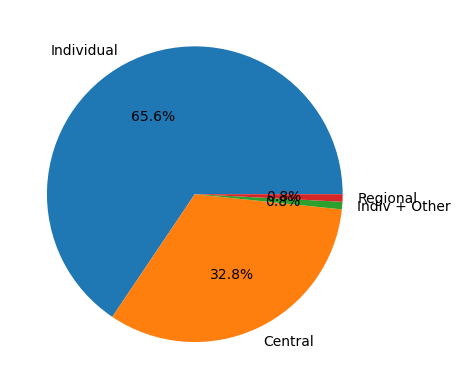

In [28]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [56]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 4 null values, and they are located at 
[27 29 57 80]


In [57]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

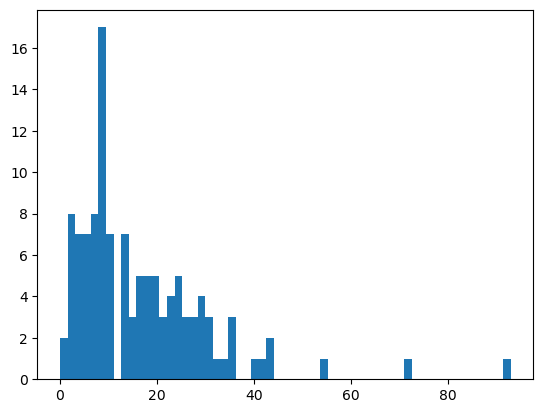

In [58]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [32]:
Elev_Num.describe()

count    118.000000
mean      16.728814
std       14.140118
min        0.000000
25%        7.000000
50%       13.000000
75%       23.750000
max       93.000000
Name: Elev_Num, dtype: float64

In [33]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A10024831
bjdCode           1138010700
Household_Num           2569
Begin_Date        20210527.0
Heating_Method       개별난방+기타
House_Type               아파트
Elec_Con                단일계약
Elev_Num                93.0
Park_Above               0.0
Park_Below            2974.0
Name: 62, dtype: object
     kaptCode Complex_Name
65  A10024831   녹번역e편한세상캐슬


## Electricity Contract; Elec_Con

In [34]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 5 null values, and they are located at 
[24 27 29 57 80]


In [35]:
Elec_Con = Elec_Con.dropna()

In [37]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 1 1 1 2 1 1 0 2 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0
 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 1 1 0 1 1 1]
Index(['단일계약', '종합계약', '기타'], dtype='object')


In [38]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    58
1    57
2     2
dtype: int64

In [40]:
eng_ind_EC = ['Single', 'Comprehensive', 'Other']

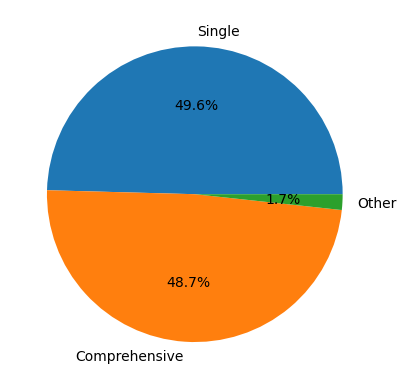

In [41]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [59]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 5 null values, and they are located at 
[24 27 29 57 80]
There are 5 null values, and they are located at 
[24 27 29 57 80]


In [43]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0      282
1       32
2       18
3       50
4       12
      ... 
117      0
118    113
119     61
120      0
121      0
Name: Park_Above, Length: 117, dtype: int16

0       779
1       131
2       289
3       176
4      1356
       ... 
117     166
118    1703
119     199
120     454
121     142
Name: Park_Below, Length: 117, dtype: int16

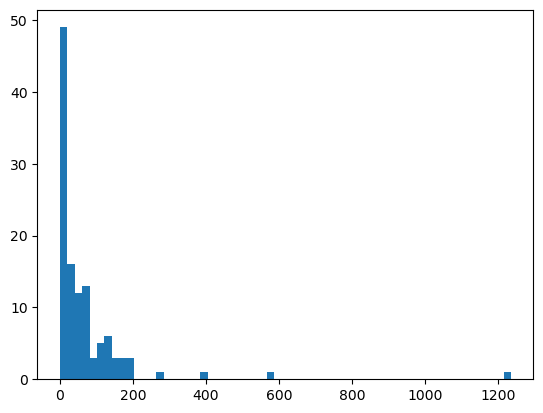

In [62]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

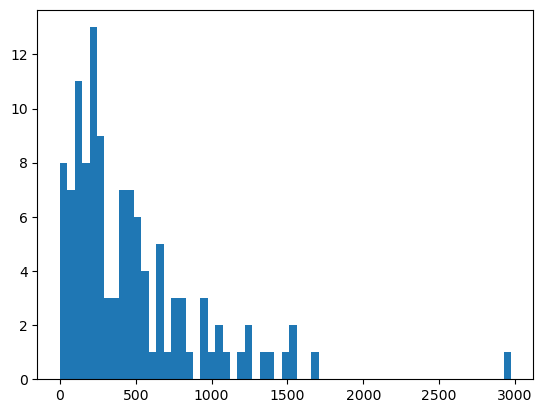

In [63]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = b)
plt.show()

In [46]:
Park_Above.describe()

count     117.000000
mean       68.393162
std       135.687392
min         0.000000
25%         3.000000
50%        35.000000
75%        80.000000
max      1236.000000
Name: Park_Above, dtype: float64

In [47]:
Park_Below.describe()

count     117.000000
mean      471.427350
std       451.099831
min         0.000000
25%       166.000000
50%       339.000000
75%       648.000000
max      2974.000000
Name: Park_Below, dtype: float64

In [48]:
printApt(Park_Above, df, dfInfo)

kaptCode           A12275202
bjdCode           1138010300
Household_Num            882
Begin_Date        20110729.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                35.0
Park_Above            1236.0
Park_Below               0.0
Name: 22, dtype: object
     kaptCode Complex_Name
23  A12275202   북한산힐스테이트7차


In [49]:
printApt(Park_Below, df, dfInfo)

kaptCode           A10024831
bjdCode           1138010700
Household_Num           2569
Begin_Date        20210527.0
Heating_Method       개별난방+기타
House_Type               아파트
Elec_Con                단일계약
Elev_Num                93.0
Park_Above               0.0
Park_Below            2974.0
Name: 62, dtype: object
     kaptCode Complex_Name
65  A10024831   녹번역e편한세상캐슬
